In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Cruzando quantidade de diplomas com notas dos alunos

In [3]:
quest_professor_df = pd.read_csv('/Users/bonifacio/projects/desafio-dados-2016/dados/microdados_saeb_2011/Dados/TS_QUEST_PROFESSOR.csv', sep=';')

In [4]:
pedagogia = quest_professor_df['TX_RESP_Q004'] == 'D'
matematica = quest_professor_df['TX_RESP_Q004'] == 'E'
letras = quest_professor_df['TX_RESP_Q004'] == 'F'
normal = quest_professor_df['TX_RESP_Q004'] == 'G'
outros = quest_professor_df['TX_RESP_Q004'] == 'H'

index_diplomados = pedagogia | matematica | letras | normal | outros

quest_professor_df['DIPLOMADO'] = index_diplomados
quest_professor_df['CONTAGEM'] = 1

diplomados_por_escola = quest_professor_df[index_diplomados][['DIPLOMADO', 'ID_ESCOLA']].groupby('ID_ESCOLA', as_index=False).sum()
professores_por_escola = quest_professor_df[['CONTAGEM', 'ID_ESCOLA']].groupby('ID_ESCOLA', as_index=False).sum()

professores_df = pd.merge(diplomados_por_escola, professores_por_escola, on='ID_ESCOLA')
professores_df['TAXA_DIPLOMADOS'] = professores_df['DIPLOMADO'] / professores_df['CONTAGEM']

In [6]:
resultado_escola = pd.read_csv('/Users/bonifacio/projects/desafio-dados-2016/dados/microdados_saeb_2011/Dados/TS_RESULTADO_ESCOLA.csv', sep=';')
resultado_escola['MEDIA_LP'] = resultado_escola['MEDIA_LP'].str.strip().str.replace(',', '.').str.replace('^$', '-1').astype(float)
resultado_escola['MEDIA_MT'] = resultado_escola['MEDIA_MT'].str.strip().str.replace(',', '.').str.replace('^$', '-1').astype(float)

In [5]:
merged_df = pd.merge(resultado_escola, professores_df, on='ID_ESCOLA')

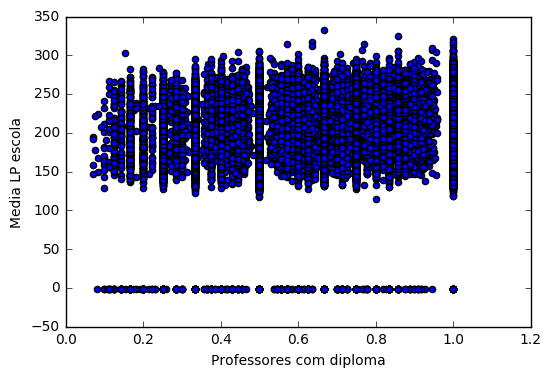

In [6]:
plt.scatter(merged_df['TAXA_DIPLOMADOS'], merged_df['MEDIA_LP'])
plt.ylabel('Media LP escola')
plt.xlabel('Professores com diploma')
plt.show()

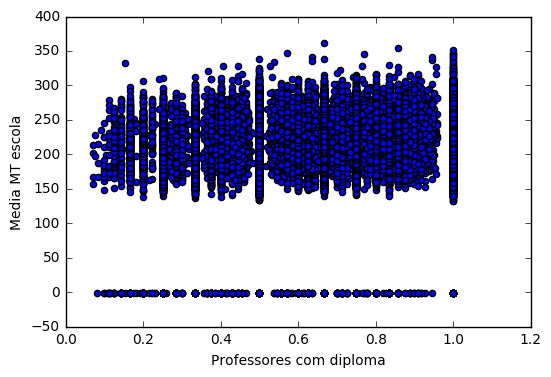

In [7]:
plt.scatter(merged_df['TAXA_DIPLOMADOS'], merged_df['MEDIA_MT'])
plt.ylabel('Media MT escola')
plt.xlabel('Professores com diploma')
plt.show()

### Cruzando diplomas de letras com notas de língua portuguesa

In [7]:
quest_professor_df['DIPLOMA_LETRAS'] = letras
diplomas_letras_por_escola = quest_professor_df[letras][['DIPLOMA_LETRAS', 'ID_ESCOLA']].groupby('ID_ESCOLA', as_index=False).sum()

professores_df = pd.merge(diplomas_letras_por_escola, professores_por_escola, on='ID_ESCOLA')
professores_df['TAXA_DIPLOMADOS_LETRAS'] = professores_df['DIPLOMA_LETRAS'] / professores_df['CONTAGEM']


letras_df = pd.merge(resultado_escola, professores_df, on='ID_ESCOLA')

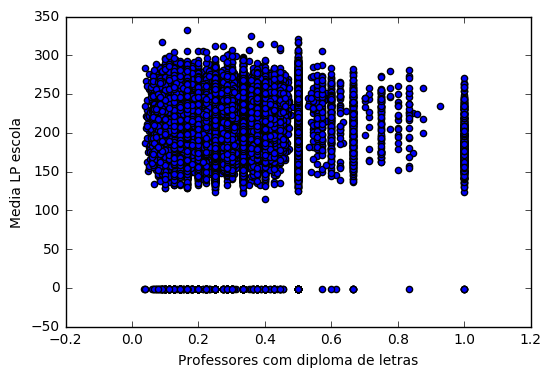

In [10]:
plt.scatter(letras_df['TAXA_DIPLOMADOS_LETRAS'], letras_df['MEDIA_LP'])
plt.ylabel('Media LP escola')
plt.xlabel('Professores com diploma de letras')
plt.show()